In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import ticker

import h5py

In [23]:
# Basis: sto-3g/protsp
sto3g_protsp_d_e = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/sto3g_protsp/SMT_Correct/simopt_diis_energy.dat", dtype=None)
sto3g_protsp_d_pe = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/sto3g_protsp/SMT_Correct/simopt_diis_rmsdpe.dat", dtype=None)
sto3g_protsp_d_pp = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/sto3g_protsp/SMT_Correct/simopt_diis_rmsdpp.dat", dtype=None)

sto3g_protsp_nd_e = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/sto3g_protsp/SMT_Correct/simopt_simple_energy.dat", dtype=None)
sto3g_protsp_nd_pe = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/sto3g_protsp/SMT_Correct/simopt_simple_rmsdpe.dat", dtype=None)
sto3g_protsp_nd_pp = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/sto3g_protsp/SMT_Correct/simopt_simple_rmsdpp.dat", dtype=None)

In [24]:
sto3g_protsp_d_iter = np.arange(1,sto3g_protsp_d_e.size,1)
sto3g_protsp_nd_iter = np.arange(1,sto3g_protsp_nd_e.size,1)

# Subtract the final energy for energy at each iteration
sto3g_protsp_d_e -= sto3g_protsp_d_e[-1]
sto3g_protsp_nd_e -= sto3g_protsp_nd_e[-1]

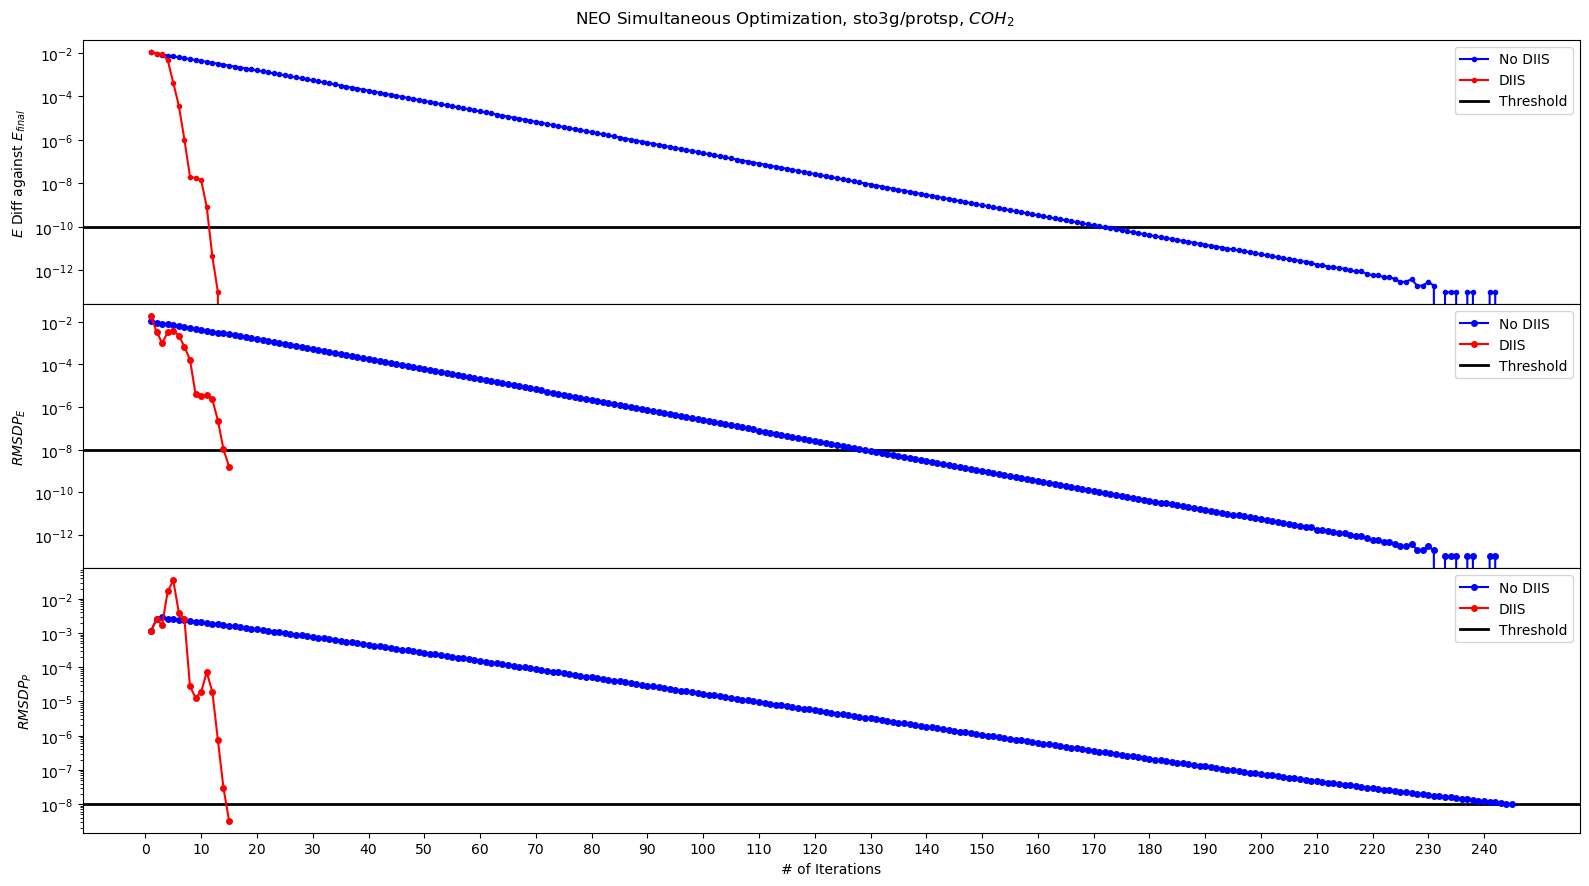

In [25]:
plt.style.use('default')
fig = plt.figure(figsize=(16,9))
gs = fig.add_gridspec(3, hspace=0)
ax = gs.subplots(sharex=True)
fig.suptitle('NEO Simultaneous Optimization, sto3g/protsp, $COH_2$')
ax[0].plot(sto3g_protsp_nd_iter,sto3g_protsp_nd_e[1:],'ob-',ms=3,label="No DIIS")
ax[0].plot(sto3g_protsp_d_iter,sto3g_protsp_d_e[1:],'or-',ms=3,label="DIIS")
ax[0].axhline(y=10**(-10),xmin=0,xmax=250,c="black",linewidth=2,zorder=0,label='Threshold')
ax[0].set_yscale("log")
ax[0].set_ylabel("$E$ Diff against $E_{final}$")
ax[0].legend()
#ax[0].axvline(x=16)

ax[1].plot(sto3g_protsp_nd_iter,sto3g_protsp_nd_e[1:],'ob-',ms=4,label="No DIIS")
ax[1].plot(sto3g_protsp_d_iter,sto3g_protsp_d_pe[1:],'or-',ms=4,label="DIIS")
ax[1].axhline(y=10**(-8),xmin=0,xmax=250,c="black",linewidth=2,zorder=0,label='Threshold')
ax[1].set_yscale("log")
ax[1].set_ylabel("$RMSD P_E$")
ax[1].legend()
#ax[1].axvline(x=16)

ax[2].plot(sto3g_protsp_nd_iter,sto3g_protsp_nd_pp[1:],'ob-',ms=4,label="No DIIS")
ax[2].plot(sto3g_protsp_d_iter,sto3g_protsp_d_pp[1:],'or-',ms=4,label="DIIS")
ax[2].axhline(y=10**(-8),xmin=0,xmax=250,c="black",linewidth=2,zorder=0,label='Threshold')
ax[2].set_yscale("log")
ax[2].set_ylabel("$RMSD P_P$")
ax[2].set_xlabel("# of Iterations")
ax[2].set_xticks(np.arange(0, sto3g_protsp_nd_e.size+1, step=10))
ax[2].legend()
#ax[2].axvline(x=16)

# Hide x labels and tick labels for all but bottom plot.
for axes in ax:
    axes.label_outer()
    

fig.set_facecolor('w')

plt.tight_layout()
plt.savefig('/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/plots/sto3g_protsp_smtdiis_vs_smtnodiis.png', dpi=300)
plt.show()



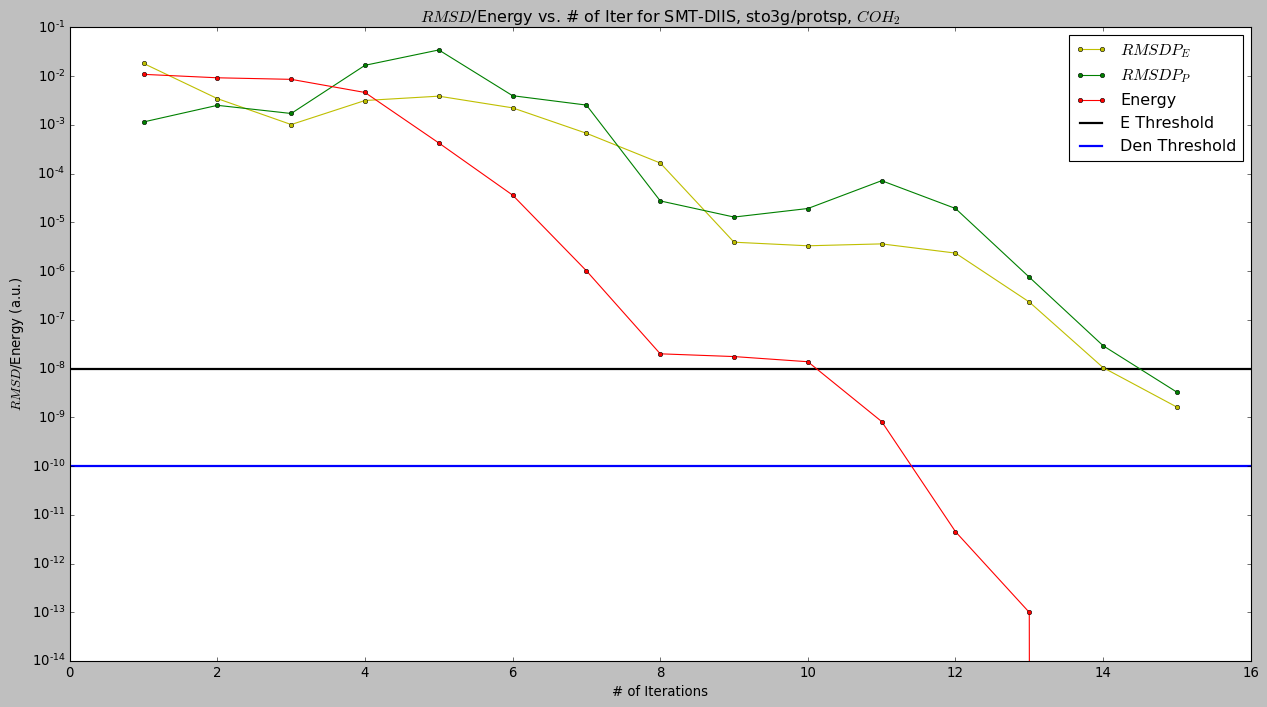

In [26]:
# Zoom in and plot the trend of RMSDPE and RMSDPP
plt.style.use('classic')
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(sto3g_protsp_d_iter,sto3g_protsp_d_pe[1:],'oy-',ms=4,label="$RMSD P_E$")
plt.plot(sto3g_protsp_d_iter,sto3g_protsp_d_pp[1:],'og-',ms=4,label="$RMSD P_P$")
plt.plot(sto3g_protsp_d_iter,sto3g_protsp_d_e[1:],'or-',ms=4,label="Energy")
plt.axhline(y=10**(-8),xmin=0,xmax=250,c="black",linewidth=2,zorder=0,label='E Threshold')
plt.axhline(y=10**(-10),xmin=0,xmax=250,c="blue",linewidth=2,zorder=0,label='Den Threshold')
plt.yscale('log')
plt.legend()
plt.title('$RMSD$/Energy vs. # of Iter for SMT-DIIS, sto3g/protsp, $COH_2$')
plt.ylabel("$RMSD$/Energy (a.u.)")
plt.xlabel("# of Iterations")
plt.tight_layout()
plt.savefig('/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/plots/sto3g_protsp_smtdiis_pe_vs_pp.png', dpi=300)
plt.show()

In [40]:
# Basis: ccpvtz(6d,10f)/pb4f2(forceCart)
ccpvtz6d10f_pb4f2fc_d_e = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/ccpvtz_6d10f_pb4f2_fc/smt_diis_e.dat", dtype=None)
ccpvtz6d10f_pb4f2fc_d_pe = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/ccpvtz_6d10f_pb4f2_fc/smt_diis_pe.dat", dtype=None)
ccpvtz6d10f_pb4f2fc_d_pp = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/ccpvtz_6d10f_pb4f2_fc/smt_diis_pp.dat", dtype=None)


ccpvtz6d10f_pb4f2fc_nd_e = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/ccpvtz_6d10f_pb4f2_fc/smt_nodiis_e.dat", dtype=None)
ccpvtz6d10f_pb4f2fc_nd_pe = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/ccpvtz_6d10f_pb4f2_fc/smt_nodiis_pe.dat", dtype=None)
ccpvtz6d10f_pb4f2fc_nd_pp = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/ccpvtz_6d10f_pb4f2_fc/smt_nodiis_pp.dat", dtype=None)

ccpvtz6d10f_pb4f2fc_stw_e = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/ccpvtz_6d10f_pb4f2_fc/stw_diis_e.dat", dtype=None)
ccpvtz6d10f_pb4f2fc_stw_pe = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/ccpvtz_6d10f_pb4f2_fc/stw_diis_pe.dat", dtype=None)
ccpvtz6d10f_pb4f2fc_stw_pp = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/ccpvtz_6d10f_pb4f2_fc/stw_diis_pp.dat", dtype=None)

In [41]:
ccpvtz6d10f_pb4f2fc_stw_e.size

4024

In [42]:
ccpvtz6d10f_pb4f2fc_stw_pp.size

4064

In [43]:
ccpvtz6d10f_pb4f2fc_stw_e[-1]

-113.8242688513595

In [44]:
ccpvtz6d10f_pb4f2fc_d_iter = np.arange(1,ccpvtz6d10f_pb4f2fc_d_e.size,1)
ccpvtz6d10f_pb4f2fc_nd_iter = np.arange(1,ccpvtz6d10f_pb4f2fc_nd_e.size,1)
ccpvtz6d10f_pb4f2fc_stw_e_iter = np.arange(1,ccpvtz6d10f_pb4f2fc_stw_e.size,1)
ccpvtz6d10f_pb4f2fc_stw_pe_iter = np.arange(1,ccpvtz6d10f_pb4f2fc_stw_pe.size,1)
ccpvtz6d10f_pb4f2fc_stw_pp_iter = np.arange(1,ccpvtz6d10f_pb4f2fc_stw_pp.size,1)

# Subtract the final energy for energy at each iteration
ccpvtz6d10f_pb4f2fc_d_e -= ccpvtz6d10f_pb4f2fc_d_e[-1]
ccpvtz6d10f_pb4f2fc_nd_e -= ccpvtz6d10f_pb4f2fc_nd_e[-1]
ccpvtz6d10f_pb4f2fc_stw_e -= ccpvtz6d10f_pb4f2fc_stw_e[-1]

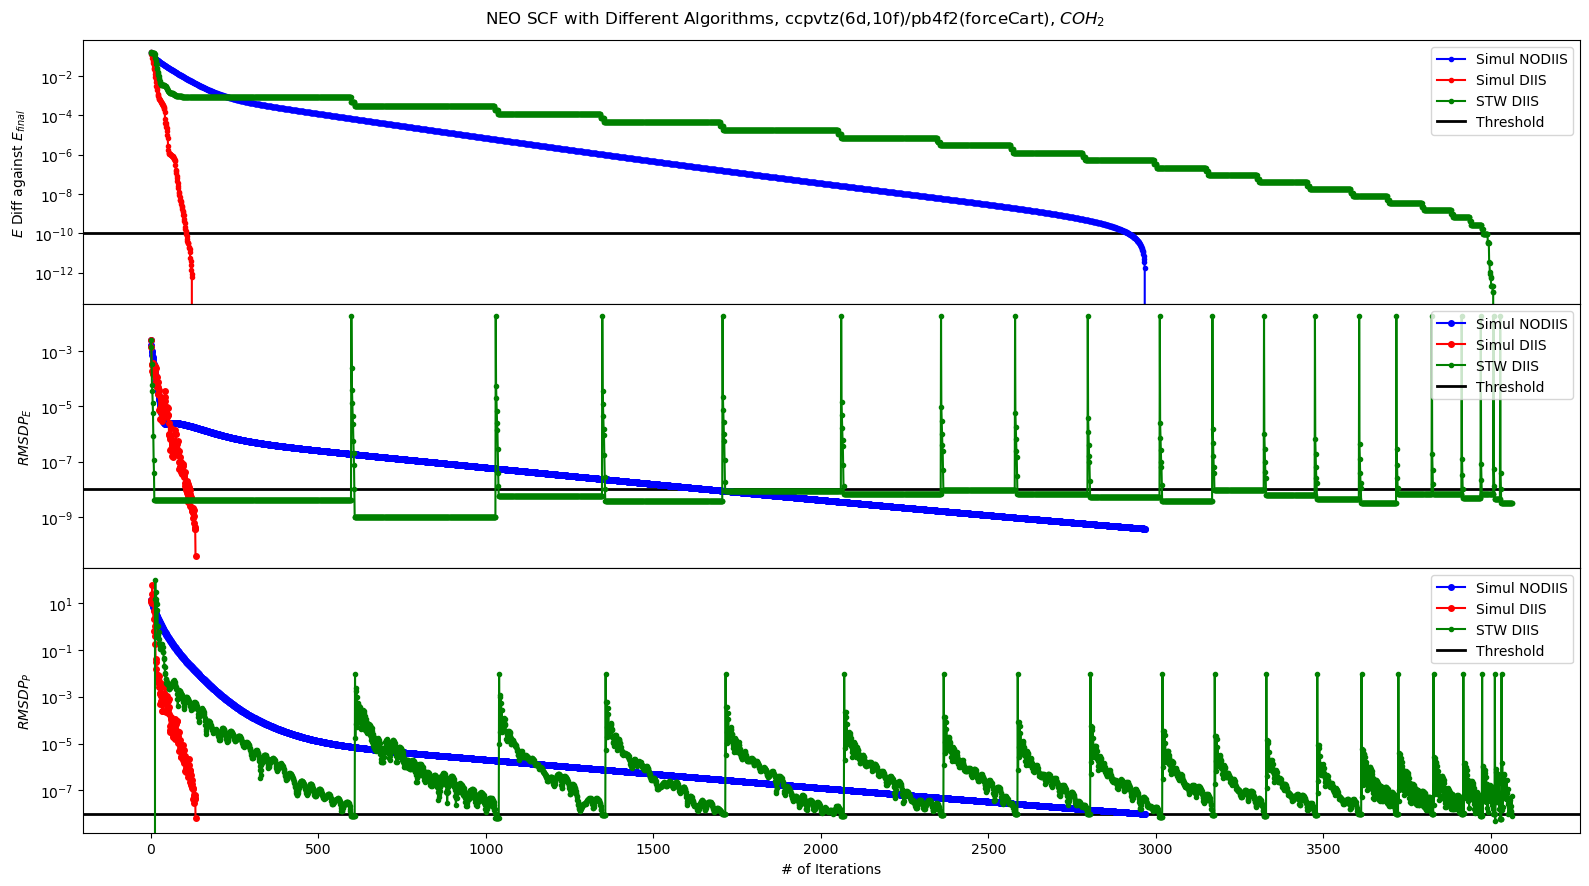

In [48]:
plt.style.use('default')
fig = plt.figure(figsize=(16,9))
gs = fig.add_gridspec(3, hspace=0)
ax = gs.subplots(sharex=True)
fig.suptitle('NEO SCF with Different Algorithms, ccpvtz(6d,10f)/pb4f2(forceCart), $COH_2$')
ax[0].plot(ccpvtz6d10f_pb4f2fc_nd_iter,ccpvtz6d10f_pb4f2fc_nd_e[1:],'ob-',ms=3,label="Simul NODIIS")
ax[0].plot(ccpvtz6d10f_pb4f2fc_d_iter,ccpvtz6d10f_pb4f2fc_d_e[1:],'or-',ms=3,label="Simul DIIS")
ax[0].plot(ccpvtz6d10f_pb4f2fc_stw_e_iter,ccpvtz6d10f_pb4f2fc_stw_e[1:],'og-',ms=3,label="STW DIIS")
ax[0].axhline(y=10**(-10),xmin=0,xmax=ccpvtz6d10f_pb4f2fc_nd_iter.size+1,c="black",linewidth=2,zorder=0,label='Threshold')
ax[0].set_yscale("log")
ax[0].set_ylabel("$E$ Diff against $E_{final}$")
ax[0].legend(loc='upper right')
#ax[0].axvline(x=16)

ax[1].plot(ccpvtz6d10f_pb4f2fc_nd_iter,ccpvtz6d10f_pb4f2fc_nd_pe[1:],'ob-',ms=4,label="Simul NODIIS")
ax[1].plot(ccpvtz6d10f_pb4f2fc_d_iter,ccpvtz6d10f_pb4f2fc_d_pe[1:],'or-',ms=4,label="Simul DIIS")
ax[1].plot(ccpvtz6d10f_pb4f2fc_stw_pe_iter,ccpvtz6d10f_pb4f2fc_stw_pe[1:],'og-',ms=3,label="STW DIIS")
ax[1].axhline(y=10**(-8),xmin=0,xmax=ccpvtz6d10f_pb4f2fc_nd_iter.size+1,c="black",linewidth=2,zorder=0,label='Threshold')
ax[1].set_yscale("log")
ax[1].set_ylabel("$RMSD P_E$")
ax[1].legend(loc='upper right')
#ax[1].axvline(x=16)

ax[2].plot(ccpvtz6d10f_pb4f2fc_nd_iter,ccpvtz6d10f_pb4f2fc_nd_pp[1:],'ob-',ms=4,label="Simul NODIIS")
ax[2].plot(ccpvtz6d10f_pb4f2fc_d_iter,ccpvtz6d10f_pb4f2fc_d_pp[1:],'or-',ms=4,label="Simul DIIS")
ax[2].plot(ccpvtz6d10f_pb4f2fc_stw_pp_iter,ccpvtz6d10f_pb4f2fc_stw_pp[1:],'og-',ms=3,label="STW DIIS")
ax[2].axhline(y=10**(-8),xmin=0,xmax=ccpvtz6d10f_pb4f2fc_nd_iter.size+1,c="black",linewidth=2,zorder=0,label='Threshold')
ax[2].set_yscale("log")
ax[2].set_ylabel("$RMSD P_P$")
ax[2].set_xlabel("# of Iterations")
#ax[2].set_xticks(np.arange(0, ccpvtz6d10f_pb4f2fc_nd_iter.size+1, step=100))
ax[2].legend(loc='upper right')
#ax[2].axvline(x=16)

# Hide x labels and tick labels for all but bottom plot.
for axes in ax:
    axes.label_outer()
    

fig.set_facecolor('w')

plt.tight_layout()
plt.savefig('/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/plots/ccpvdz6d10f_pb4f2fc_smtdiis_vs_smtnodiis.png', dpi=300)
plt.show()

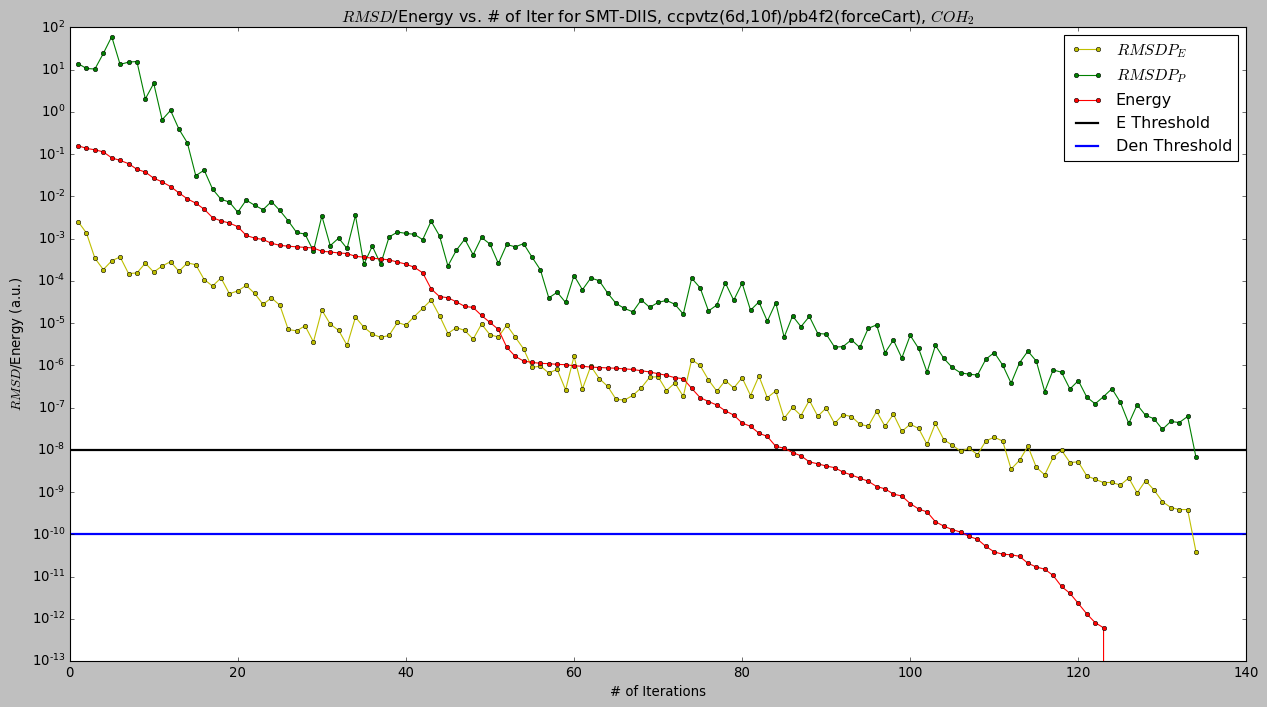

In [46]:
# Zoom in and plot the trend of RMSDPE and RMSDPP
plt.style.use('classic')
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(ccpvtz6d10f_pb4f2fc_d_iter,ccpvtz6d10f_pb4f2fc_d_pe[1:],'oy-',ms=4,label="$RMSD P_E$")
plt.plot(ccpvtz6d10f_pb4f2fc_d_iter,ccpvtz6d10f_pb4f2fc_d_pp[1:],'og-',ms=4,label="$RMSD P_P$")
plt.plot(ccpvtz6d10f_pb4f2fc_d_iter,ccpvtz6d10f_pb4f2fc_d_e[1:],'or-',ms=4,label="Energy")
plt.axhline(y=10**(-8),xmin=0,xmax=ccpvtz6d10f_pb4f2fc_d_iter.size+1,c="black",linewidth=2,zorder=0,label='E Threshold')
plt.axhline(y=10**(-10),xmin=0,xmax=ccpvtz6d10f_pb4f2fc_d_iter.size+1,c="blue",linewidth=2,zorder=0,label='Den Threshold')
plt.yscale('log')
plt.legend()
plt.title('$RMSD$/Energy vs. # of Iter for SMT-DIIS, ccpvtz(6d,10f)/pb4f2(forceCart), $COH_2$')
plt.ylabel("$RMSD$/Energy (a.u.)")
plt.xlabel("# of Iterations")
plt.tight_layout()
plt.savefig('/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/plots/ccpvdz6d10f_pb4f2fc_smtdiis_pe_vs_pp.png', dpi=300)
plt.show()

In [45]:
ccpvtz6d10f_pb4f2fc_nd_iter.size

2968

In [ ]:
/sw/contrib/chem-src/gdv/j19/gdv/bsd/gdvtest -w /gscratch/chem/al777/gau_diss -scrdir='/scr'